In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [0]:
x_train, x_val = x_train / 255.0, x_val / 255.0

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
tf.keras.backend.clear_session()

tf.random.set_seed(42)

encoder = tf.keras.Sequential()
encoder.add(tf.keras.layers.Flatten(input_shape = (28,28)))
encoder.add(tf.keras.layers.Dense(512, activation='relu'))
encoder.add(tf.keras.layers.Dense(256, activation='relu'))

decoder = tf.keras.Sequential()
decoder.add(tf.keras.layers.Dense(512, activation='relu', input_shape = (256,)))
decoder.add(tf.keras.layers.Dense(784))
decoder.add(tf.keras.layers.Reshape((28,28)))

autoencoder = tf.keras.Sequential([encoder, decoder])

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()

autoencoder.compile(optimizer = opt, loss = loss)

autoencoder.fit(x_train, x_train, epochs = 5, batch_size = 64, validation_data= (x_val, x_val))

Epoch 1/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0139 - val_loss: 0.0068
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 3/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0043 - val_loss: 0.0041


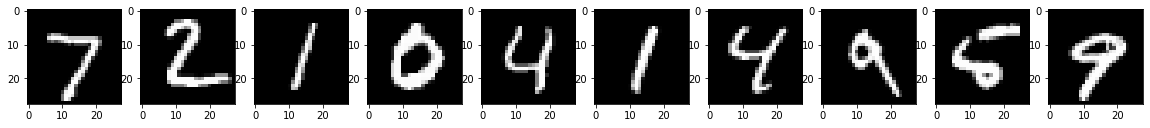

In [12]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_val[i].reshape((28,28)), cmap= 'gray');

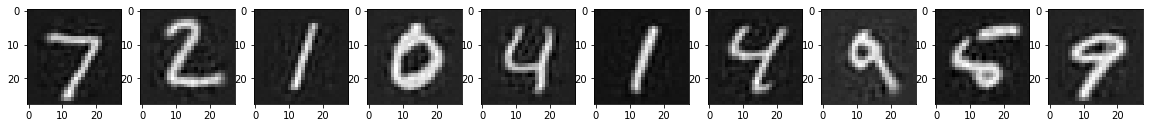

In [13]:
plt.figure(figsize=(20,20))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(autoencoder(np.expand_dims(x_val[i], 0)).numpy().reshape(28,28), cmap='gray')

In [0]:
x_train_1vs8 = x_train[np.logical_or(y_train == 1, y_train == 8)]
x_val_1vs8 = x_val[np.logical_or(y_val == 1, y_val == 8)]

In [15]:
tf.keras.backend.clear_session()

tf.random.set_seed(42)

encoder = tf.keras.Sequential()
encoder.add(tf.keras.layers.Flatten(input_shape = (28,28)))
encoder.add(tf.keras.layers.Dense(512, activation='relu'))
encoder.add(tf.keras.layers.Dense(2, activation='relu'))

decoder = tf.keras.Sequential()
decoder.add(tf.keras.layers.Dense(512, activation='relu', input_shape = (2,)))
decoder.add(tf.keras.layers.Dense(784))
decoder.add(tf.keras.layers.Reshape((28,28)))

autoencoder = tf.keras.Sequential([encoder, decoder])

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()

autoencoder.compile(optimizer = opt, loss = loss)

autoencoder.fit(x_train_1vs8, x_train_1vs8, epochs = 5, batch_size = 64, validation_data= (x_val_1vs8, x_val_1vs8))

Epoch 1/5
197/197 [==============================] - 2s 11ms/step - loss: 0.0373 - val_loss: 0.0310
Epoch 2/5
197/197 [==============================] - 2s 10ms/step - loss: 0.0301 - val_loss: 0.0289
Epoch 3/5
197/197 [==============================] - 2s 10ms/step - loss: 0.0286 - val_loss: 0.0279
Epoch 4/5
197/197 [==============================] - 2s 10ms/step - loss: 0.0278 - val_loss: 0.0272
Epoch 5/5
197/197 [==============================] - 2s 10ms/step - loss: 0.0272 - val_loss: 0.0267


In [0]:
representation_2D = encoder.predict(x_val_1vs8[:100])
y_val_1vs8 = y_val[np.logical_or(y_val == 1, y_val == 8)]

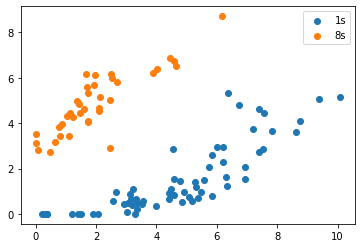

In [29]:
representation_2D_1s = representation_2D[np.array(y_val_1vs8[:100] == 1), :]
representation_2D_8s = representation_2D[np.array(y_val_1vs8[:100] == 8), :]

plt.scatter(representation_2D_1s[:,0], representation_2D_1s[:,1], label = '1s')
plt.scatter(representation_2D_8s[:,0], representation_2D_8s[:,1], label = '8s')
plt.legend()

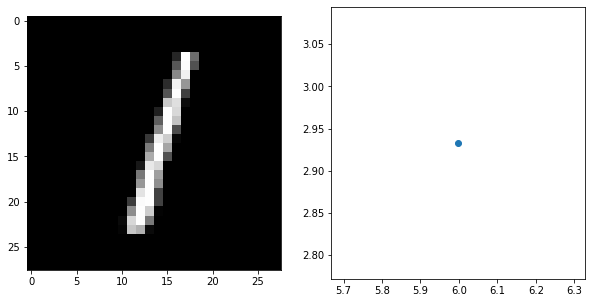

In [103]:
plt.figure(figsize=(10,5))
img = x_val_1vs8[0]
plt.subplot(1,2,1)
plt.imshow(img.reshape((28,28)), cmap= 'gray');
plt.subplot(1,2,2)
plt.scatter(*encoder.predict(np.expand_dims(img, 0)).squeeze())

In [0]:
img_360 = []
img_360_2D = []
for theta in range(1,361):
    img_rot = tf.keras.preprocessing.image.apply_affine_transform(img.reshape(28,28,1), theta = theta)
    img_360.append(img_rot)
    img_360_2D.append(encoder.predict(np.expand_dims(img_rot, 0)))


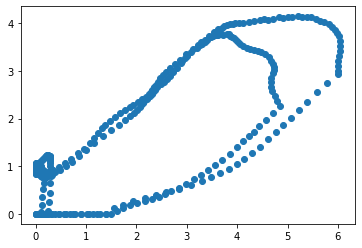

In [105]:
img_360_2D = np.concatenate(img_360_2D, axis = 0)

plt.scatter(img_360_2D[:,0], img_360_2D[:,1])